<a href="https://colab.research.google.com/github/Sruthy08/DATA_ANALYTICS/blob/main/Breast_Cancer_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gradient Boosting Algorithm.**

In [1]:
from google.colab import files
files.download("breast_cancer_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**step 1: Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**step 2: Load Dataset**

In [3]:
data = load_breast_cancer()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

**optional: save to CSV if needed**

In [4]:
df = x.copy()
df['target']=y
df.to_csv("breast_cancer_data.csv", index=False)

**step 3: Split into train and test**

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**step 4: Train Gradient Boosting Classifier**

In [7]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

**step 5: Evaluate model**

In [9]:
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193

Confusion Matrix:
 [[40  3]
 [ 2 69]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



**step 6: Feature Importance Plot**

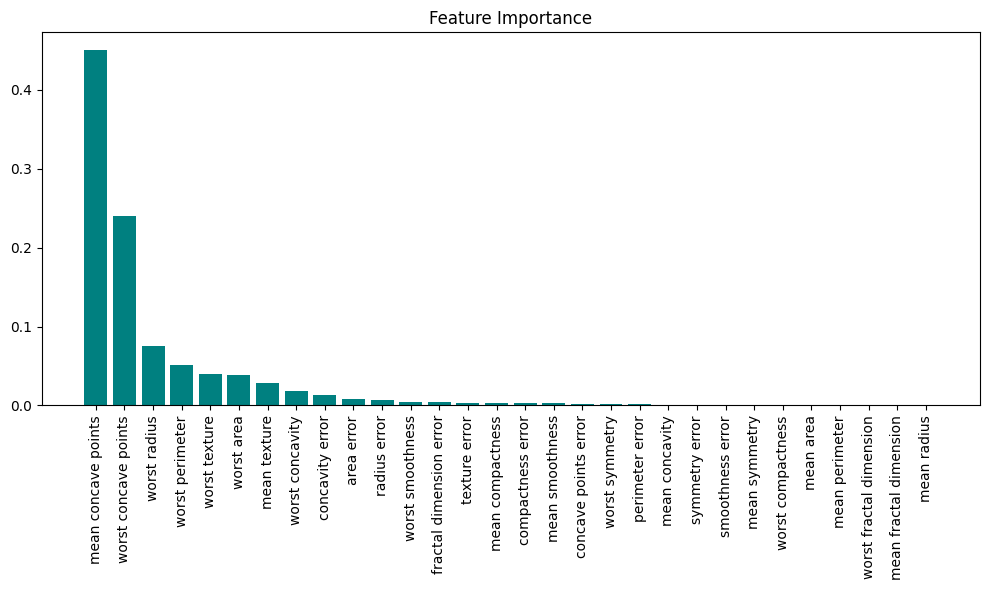

In [11]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = x.columns

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(x.shape[1]), importances[indices], color="teal", align="center")
plt.xticks(range(x.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()